# Bow Image Classification | InceptionV3

### *Course Project - Deep Learning*
#### `Part 2B | Fine Tuning`

**Author:** Sarang Galada<br>
**School:** School of Computing & Data Science, Sai University<br>
**Email ID:** sarang.g-25@scds.saiuniversity.edu.in<br>
**Date created:** 26/12/2023<br><br>
**Description:** Classification of Bow (weapon) images into 5 types using Transfer Learning and Fine Tuning

*   *Problem*: `Image Classification`
*   *Dataset*: `Bow Images`
*   *Model*: `InceptionV3`
*   *Key library used*: `TensorFlow Keras`

## Downloading the model and datasets

In [ ]:
# Import required libraries

import numpy as np
np.random.seed(42)

import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf
print(tf.__version__)

from tensorflow import keras
tf.random.set_seed(42)

2.15.0


In [ ]:
# Mount the Google Drive

from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# Since the model and datasets are already prepared, load them directly from Drive

X_train = np.load('/content/gdrive/MyDrive/Models/BowImageClassification/X_train.npy')
X_test = np.load('/content/gdrive/MyDrive/Models/BowImageClassification/X_test.npy')
y_train = np.load('/content/gdrive/MyDrive/Models/BowImageClassification/y_train.npy')
y_test = np.load('/content/gdrive/MyDrive/Models/BowImageClassification/y_test.npy')

print(f"No. of training samples: {X_train.shape[0]}")
print(f"No. of testing samples: {X_test.shape[0]}")

No. of training samples: 607
No. of testing samples: 203


In [ ]:
labels = np.load('/content/gdrive/MyDrive/Models/BowImageClassification/labels.npy')
print(labels)

['Compound Bow' 'Crossbow' 'Kyudo Bow' 'Longbow' 'Traditional Recurve Bow']


In [ ]:
# Load the Transfer Learning model based on InceptionV3

model2_FT = keras.models.load_model('/content/gdrive/MyDrive/Models/BowImageClassification/InceptionV3_TransferLearning_BestModel.h5')
model2_FT.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, None, None, 3)]      0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, None, None, 32)       864       ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, None, None, 32)       96        ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 activation (Activation)     (None, None, None, 32)       0         ['batch_normalization[0][0

## Fine Tuning the model
In this Fine Tuning experiment, we freeze the initial 35% of the Feature Extractor's layers so that they are not updated during backpropagation

In [ ]:
# NOTE: Last 4 layers of the model belong to classifier
train_threshold = int(0.35*(len(model2_FT.layers)-4))

for layer in model2_FT.layers[:train_threshold]:
    layer.trainable = False

for layer in model2_FT.layers[train_threshold:]:
    layer.trainable = True

## Compiling and training the model

In [ ]:
model2_FT.compile(loss='sparse_categorical_crossentropy',
                 optimizer='adam',
                 metrics=['accuracy'])

callbacks_FT = [keras.callbacks.ModelCheckpoint("bestFT.h5",
                                                monitor='val_accuracy',
                                                save_weights_only=True,
                                                save_best_only=True)]

history_FT = model2_FT.fit(x = X_train, y = y_train, epochs=10,
                          validation_split=0.1, batch_size=16, callbacks=callbacks_FT)

Epoch 1/10
35/35 [==============================] - 46s 287ms/step - loss: 1.7030 - accuracy: 0.7234 - val_loss: 8.6326 - val_accuracy: 0.2951
Epoch 2/10
35/35 [==============================] - 4s 111ms/step - loss: 0.7247 - accuracy: 0.7930 - val_loss: 1482.4176 - val_accuracy: 0.5574
Epoch 3/10
35/35 [==============================] - 3s 91ms/step - loss: 0.5106 - accuracy: 0.8480 - val_loss: 438.1400 - val_accuracy: 0.5574
Epoch 4/10
35/35 [==============================] - 3s 93ms/step - loss: 0.4612 - accuracy: 0.8645 - val_loss: 37.8790 - val_accuracy: 0.2295
Epoch 5/10
35/35 [==============================] - 4s 104ms/step - loss: 0.2987 - accuracy: 0.9194 - val_loss: 5.4288 - val_accuracy: 0.6393
Epoch 6/10
35/35 [==============================] - 4s 107ms/step - loss: 0.3504 - accuracy: 0.8974 - val_loss: 158.0471 - val_accuracy: 0.6393
Epoch 7/10
35/35 [==============================] - 4s 127ms/step - loss: 0.2847 - accuracy: 0.9121 - val_loss: 688.5740 - val_accuracy: 0.67

## Visualising the model's training accuracy

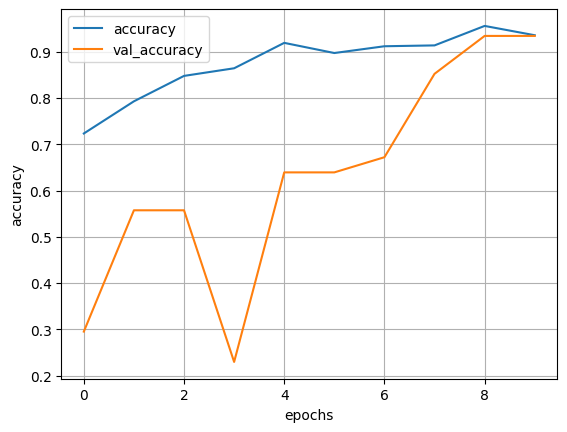

In [ ]:
progress = {k:v for k,v in history_FT.history.items() if k in ['accuracy', 'val_accuracy']}

pd.DataFrame(progress).plot()
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.grid(True)
plt.show()

## Evaluating the model

In [ ]:
# Loading the model's best weights during training
model2_FT.load_weights("bestFT.h5")

# Test loss and test accuracy
testLoss_FT, testAccuracy_FT = model2_FT.evaluate(x = X_test, y = y_test, batch_size=16)
print("Test-loss: %f, Test-accuracy: %f" % (testLoss_FT, testAccuracy_FT))

13/13 [==============================] - 3s 224ms/step - loss: 0.3567 - accuracy: 0.8916
Test-loss: 0.356735, Test-accuracy: 0.891626


In [ ]:
# Making predictions on the test set

y_proba = model2_FT.predict(X_test)
y_pred = np.argmax(y_proba, axis=-1)
print(y_pred)

7/7 [==============================] - 7s 58ms/step
[1 0 4 4 0 0 0 0 4 4 0 0 1 0 0 0 4 1 0 1 0 4 0 0 0 4 0 0 0 0 0 1 4 0 0 0 0
 4 3 4 4 4 0 0 1 0 1 0 0 1 4 0 4 0 0 0 4 0 4 0 0 0 0 0 0 0 4 4 0 4 0 1 0 0
 0 0 0 0 0 0 4 4 4 0 0 3 4 4 4 0 4 0 1 4 4 4 4 0 0 4 1 0 0 4 0 0 1 1 0 0 4
 0 0 0 4 1 0 1 4 1 1 0 4 4 0 0 0 4 0 0 4 0 4 4 0 4 1 0 4 0 4 0 3 0 4 0 4 4
 0 0 3 0 4 4 1 1 4 0 0 0 4 4 0 4 0 4 0 4 0 4 0 1 4 0 0 4 3 4 0 0 1 0 0 4 4
 4 4 0 3 0 0 4 1 4 4 0 0 0 4 0 0 1 0]


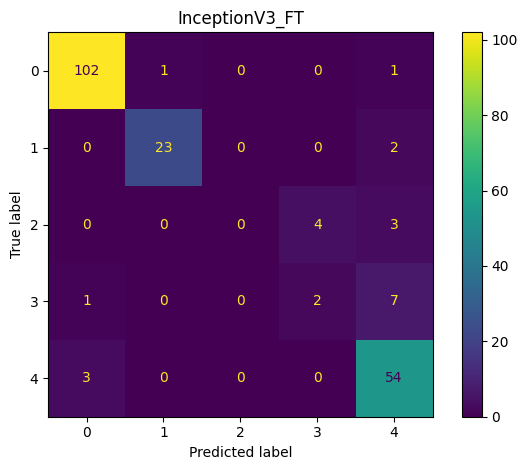

['Compound Bow' 'Crossbow' 'Kyudo Bow' 'Longbow' 'Traditional Recurve Bow']


In [ ]:
# Confusion Matrix of the model's predictions on the test data

from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

cm = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_true = y_test, y_pred = y_pred))
cm.plot()
plt.title("InceptionV3_FT")
plt.xlabel('Predicted label')
plt.ylabel('True label')

plt.tight_layout()
plt.savefig("ConfMat_InceptionV3_FT.png", dpi=300, format='png', pad_inches=0.3)
plt.show()

print(labels)

In [ ]:
# Classification report

from sklearn.metrics import classification_report

clf_report = classification_report(y_test, y_pred)
print(clf_report)

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       104
           1       0.96      0.92      0.94        25
           2       0.00      0.00      0.00         7
           3       0.33      0.20      0.25        10
           4       0.81      0.95      0.87        57

    accuracy                           0.89       203
   macro avg       0.61      0.61      0.61       203
weighted avg       0.85      0.89      0.87       203



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Save the model

In [ ]:
# Save the best performing Fine-tuned model
model2_FT.save('/content/gdrive/MyDrive/Models/BowImageClassification/InceptionV3_FineTuning_BestModel.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
